In [1]:
import pytesseract
from PIL import Image, ImageEnhance
from selenium import webdriver
from pyquery import PyQuery as pq
from time import sleep
redata = [] #記錄資料
position = {} # 地點
average = {}
driver = webdriver.Chrome("chromedriver")
product=input("What do you want? ")
#while True:
#    try: 
driver.get("https://shopee.tw/search?keyword="+product
          )# FIRST

What do you want? pc


In [2]:
hight = 0
while True:
    hight +=1000
    try:
        driver.execute_script("window.scrollTo({},{})".format(0,hight)) 
        sleep(0.5)
        if hight == 6000:
            break
    except:
        break
doc = driver.find_elements_by_css_selector(".col-xs-2-4")
GG=0
checkopen = 0
for i in doc:
    checkopen = 0
    try:
        webpo = i.find_element_by_css_selector(".col-xs-2-4>div>a").get_attribute("href") #取網頁
        posit = i.find_element_by_css_selector("._3amru2") #地點
        try:
            star = len(i.find_elements_by_css_selector(".shopee-rating-stars__star-wrapper")) #看多小星星
        except:
            star = 0
        if star != 0:
            subcp = 0
            cp = 0
            dataaa = webdriver.Chrome("chromedriver")
            dataaa.get(webpo)
            checkopen = 1
            pd = dataaa.find_element_by_css_selector(".flex-auto")
            hight = 0
            print('1')
            while True:
                hight +=1000
                try:
                    dataaa.execute_script("window.scrollTo({},{})".format(0,hight))
                    sleep(0.5)
                    if hight == 6000:
                        break
                except:
                    break
            pd = dataaa.find_element_by_css_selector(".flex-auto")
            try:
                name = dataaa.find_element_by_css_selector(".qaNIZv") 
            except:
                print("nameerror1")
            try:
                starnum = dataaa.find_element_by_css_selector("._3Oj5_n")
            except:
                starnum = 0
            try:
                money =dataaa.find_element_by_css_selector("._3n5NQx")
            except:
                print("moneyhead")
            try:
                sale = dataaa.find_element_by_css_selector("._22sp0A")
            except:    
                print("saleerror")
            print('2')
            try:
                ima = dataaa.find_element_by_css_selector("#main > div > div.shopee-page-wrapper > div.page-product > div.container > div:nth-child(3) > div.page-product__content > div.page-product__content--left > div:nth-child(2) > div > div.product-rating-overview > div.product-rating-overview__filters > div.product-rating-overview__filter.product-rating-overview__filter--active.product-rating-overview__filter--all")
            except:
                print("2.1")
            try:
                ima.click()
            except:
                print('2.2')
            try:
                star3 = dataaa.find_element_by_css_selector(".product-rating-overview__filters > div:nth-child(4)") #check 有沒有三星評價
            except:
                print("2.3")
            try:
                star = star3.text.split()
            except:
                print('2.4')
            try:
                star3 = star[2].replace("(","").replace(")","")
            except:
                print('2.5')
            star3 =int(star3)
            print("star3 :",star3)
            if star3 < 10:
                subcp += 1
            elif star3 >= 10:
                subcp += 2
            star2 = dataaa.find_element_by_css_selector(".product-rating-overview__filters > div:nth-child(5)")
            star = star2.text.split()
            star2 = star[2].replace("(","").replace(")","")
            star2 =int(star2)
            if star2 < 10:
                subcp += 2
            elif star2 >= 10:
                subcp += 3
            print("star2 :",star2)
            star1 = dataaa.find_element_by_css_selector(".product-rating-overview__filters > div:nth-child(6)")
            star = star1.text.split()
            star1 = star[2].replace("(","").replace(")","")
            star1 =int(star1)
            if star1 < 10:
                subcp += 2
            elif star1 >= 10:
                subcp += 3
            print("star1 :",star1)
            print('3')
            try:
                freight = dataaa.find_element_by_css_selector(".shopee-drawer > .flex") #取運費
                freight = freight.text.replace("$","")
               # print("freight =",freight,sep="")
                if " " in freight:
                    freight = freight.replace(" ","")
                  #  print("freight2 =",freight,sep="")
                if "-" in freight:
                    freight= freight.split("-")
                  #  print("freight3 =",freight,sep="")
                try:
                    if type(freight) != list:
                        freight = int(freight)
                        if 0 == freight:
                            cp += 1
                except:
                    print("freight1error")
                try:
                    if type(freight) == list:
                        for j in range(len(freight)):
                            freight[j] = int(freight[j])
                        if 0 in freight:
                            cp += 1
                except:
                    print("freight2error")
            except:
                try:
                    freight = dataaa.find_element_by_css_selector("._3djNyJ > .flex > .flex ")
                    if freight == "含運費":
                        freight = 0
                        cp += 1
                except:
                    print("freighterror")
                    print(webpo)
            print('4',starnum)
            if starnum != 0:
                try:
                    rd = {}
                    rd["title"] = name.text
                    starchange = starnum.text
         #           print("starchange = ",starchange)
         #           print(type(starchange))
                    rd["star"] = float(starchange)
                except:
                    print("cperror")
                try:  
                    cp = float(starchange)
          #          print("checkcp = ",cp)
                except:
                    print("cperror2")
                money = money.text.replace("$","").replace(",","")
                try:
                    if ' ' in money:
                        money = money.replace(" ","")
           #             print("money3 =",money,sep="")
                    if "-" in money:
                        money = money.split("-")
           #             print("money4 = ",money)
                        try:
                            for ii in range(len(money)):
                                money[ii] = int(money[ii])
                        except:
                            print("moneyerror")
                    else:
                        if ' ' in money:
                            money.replace(" ","")
                    if type(money) != list:
                        money = int(money)
                except:
                    print("moneyerror2")
          #      print("money5 =", type(money))
          #      print("money6 = ",money)
                try:
                    rd["money"] = money
                    rd["website"] = webpo
                    sold = sale.text
                    if "," in sold:
                        sold = sold.replace(",","")
                    if "." in sold:
                        sold = sold.replace(".","")
                    if "萬" in sold:
                        sold = sold.replace("萬","0000")
                    if "千" in sold:
                        sold = sold.replace("千","000")
                    if "仟" in sold:
                        sold = sold.replace("仟","000")
                    if "百" in sold:
                        sold = sold.replace("百","00")
                    if "佰" in sold:
                        sold = sold.replace("佰","00")
                    sold = int(sold)
                    print("money = ",money)
                    print("sold = ",sold)
                except:
                    print("error1")
                    print("money =",money)
                    print("webpo =",webpo)
                try:
                    if type(money) == list:
                        if sold >= max(money):
                            cp += 3
                            print("cp+3")
                        elif sold/max(money)*100 >= 50:
                            cp += 2
                            print("cp+2")
                        else:
                            cp += 1
                            print("cp+1")
                    else:
                        if sold >= money:
                            cp += 3
                            print("cp+3")
                        elif sold/money*100 >= 50:
                            cp += 2
                            print("cp+2")
                        else:
                            cp += 1
                            print("cp+1")
                    print("cp = ",cp)
                    print("subcp = ",subcp)
                    cp = cp-subcp
                except:
                    print("error2")
                    print(webpo)
                try:
                    rd["sold"] = sold
                    rd["position"] = posit.text
                    rd["CP"] = cp 
                    rd["freight"] = freight
                    print(rd)
                except:
                    print("error3")
                print("cp = ",cp)
                if cp >= 1:
             #       print("cp >= 8")
                    dataaa.save_screenshot(str(GG)+'.png')
                    imagename = str(GG)+'.png'
                    rd["image"] = imagename
                    GG += 1
                    redata.append(rd)
                    print("OK")
                    if rd["position"] not in position and rd["position"] != "":
                        position[rd["position"]] = 1
                    elif rd["position"] in position:
                        value = position[rd["position"]]
                        value += 1
                        position[rd["position"]] = value
                else:
                    print("cp down")
                    pass
                #print(redata)
            dataaa.quit()
            if GG >= 10:
                break
            print("GG =",GG)
    except:
        if checkopen:
             dataaa.quit()
        pass
driver.quit()

1
2
2.1
2.2
2.3
2.4
2.5
1
2
2.1
2.2
2.3
2.4
2.5
1
2
2.1
2.2
star3 : 0
star2 : 0
star1 : 0
3
4 <selenium.webdriver.remote.webelement.WebElement (session="279b990c469b0f0ab614f9c997d1f5ff", element="9c72db2f-06f4-46b8-b516-445cb540f74e")>
money =  300
sold =  20
cp+1
cp =  6.0
subcp =  5
{'title': '【🐱內個🐱| 杜比音效】Dolby Access PC Win10 / Xbox 【序號兌換】', 'star': 5.0, 'money': 300, 'website': 'https://shopee.tw/%E3%80%90%F0%9F%90%B1%E5%85%A7%E5%80%8B%F0%9F%90%B1-%E6%9D%9C%E6%AF%94%E9%9F%B3%E6%95%88%E3%80%91Dolby-Access-PC-Win10-Xbox-%E3%80%90%E5%BA%8F%E8%99%9F%E5%85%8C%E6%8F%9B%E3%80%91-i.324883926.6266397838', 'sold': 20, 'position': '', 'CP': 1.0, 'freight': 0}
cp =  1.0
OK
GG = 1
1
2
2.1
2.2
2.3
2.4
2.5
star3 : 0
1
2
2.1
2.2
2.3
2.4
2.5
star3 : 0
1
2
2.1
2.2
star3 : 0
star2 : 0
star1 : 0
3
4 <selenium.webdriver.remote.webelement.WebElement (session="f6259dbaa57857c399a485b0c0dd8d45", element="ae6b63ce-8f49-408f-a7a9-60e1ace20b17")>
money =  868
sold =  1
cp+1
cp =  6.0
subcp =  5
{'title': 'A

In [3]:
redata

[{'title': '【🐱內個🐱| 杜比音效】Dolby Access PC Win10 / Xbox 【序號兌換】',
  'star': 5.0,
  'money': 300,
  'website': 'https://shopee.tw/%E3%80%90%F0%9F%90%B1%E5%85%A7%E5%80%8B%F0%9F%90%B1-%E6%9D%9C%E6%AF%94%E9%9F%B3%E6%95%88%E3%80%91Dolby-Access-PC-Win10-Xbox-%E3%80%90%E5%BA%8F%E8%99%9F%E5%85%8C%E6%8F%9B%E3%80%91-i.324883926.6266397838',
  'sold': 20,
  'position': '',
  'CP': 1.0,
  'freight': 0,
  'image': '0.png'},
 {'title': 'Aigo Darkflash Pc 機箱風扇 Dr12 Pro Hub 遙控器 Aura 與電纜同步集線器控制器紅外遙控',
  'star': 5.0,
  'money': 868,
  'website': 'https://shopee.tw/Aigo-Darkflash-Pc-%E6%A9%9F%E7%AE%B1%E9%A2%A8%E6%89%87-Dr12-Pro-Hub-%E9%81%99%E6%8E%A7%E5%99%A8-Aura-%E8%88%87%E9%9B%BB%E7%BA%9C%E5%90%8C%E6%AD%A5%E9%9B%86%E7%B7%9A%E5%99%A8%E6%8E%A7%E5%88%B6%E5%99%A8%E7%B4%85%E5%A4%96%E9%81%99%E6%8E%A7-i.327835255.4861103791',
  'sold': 1,
  'position': '中國大陸',
  'CP': 1.0,
  'freight': [0, 70],
  'image': '1.png'},
 {'title': '四核 迷你電腦 小主機 微型PC Win10 辦公 遊戲 台式一體 整機 客廳 電腦棒',
  'star': 5.0,
  'money': [3250, 7930],


In [5]:
totalcp = 0
totalmoney = 0
totalstar = 0
totalsold = 0
for i in range(len(redata)):
    money = redata[i].get("money")
    if type(redata[i].get("money")) == list:
        totalmoney += max(money)
    else:
        totalmoney += money
    totalcp += redata[i].get("CP")
    totalsold += redata[i].get("sold")
    totalstar += redata[i].get("star")
print("money = %.2f" % (totalmoney/len(redata)))
print("cp =",totalcp/len(redata))
print("sold = %.2f" %(totalsold/len(redata)))
print("stars = %.2f" % (totalstar/len(redata)))
print(position)
print(len(position))

money = 1331.33
cp = 1.4333333333333333
sold = 101.33
stars = 4.99
{'中國大陸': 4, '新竹市東區': 1, '新北市板橋區': 1, '新北市林口區': 1}
4


In [6]:
import pytesseract
from PIL import Image, ImageEnhance
j = 0

dict_items([('title', '【🐱內個🐱| 杜比音效】Dolby Access PC Win10 / Xbox 【序號兌換】'), ('star', 5.0), ('money', 300), ('website', 'https://shopee.tw/%E3%80%90%F0%9F%90%B1%E5%85%A7%E5%80%8B%F0%9F%90%B1-%E6%9D%9C%E6%AF%94%E9%9F%B3%E6%95%88%E3%80%91Dolby-Access-PC-Win10-Xbox-%E3%80%90%E5%BA%8F%E8%99%9F%E5%85%8C%E6%8F%9B%E3%80%91-i.324883926.6266397838'), ('sold', 20), ('position', ''), ('CP', 1.0), ('freight', 0), ('image', '0.png')])


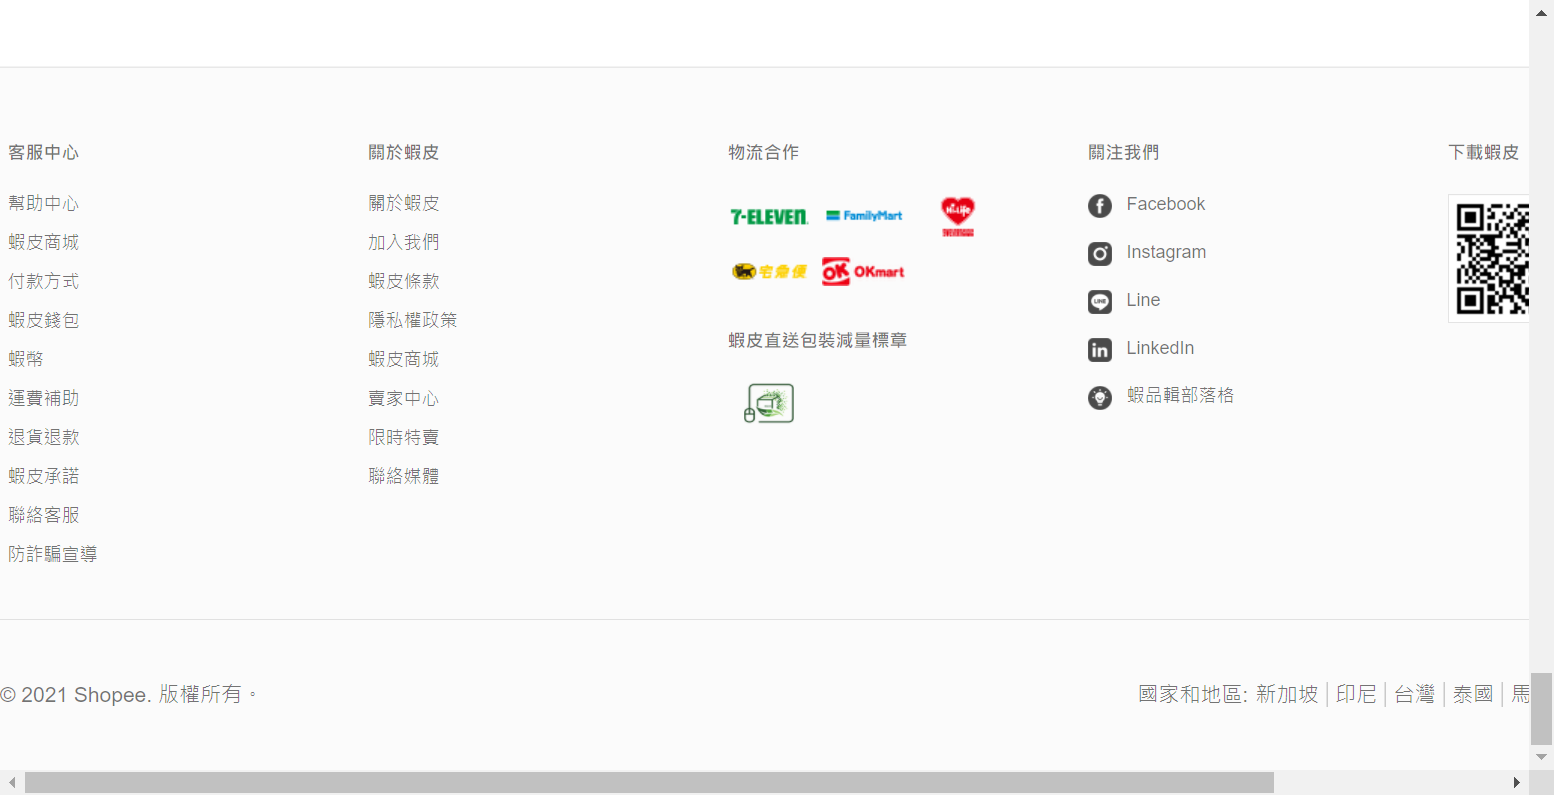

In [7]:
print(redata[j].items())
name = redata[j].get("image")
j+=1
Image.open(name)

In [8]:
import pandas as pds
import matplotlib.pyplot as plt
data = pds.DataFrame(redata)
data['Average_price'] =  totalmoney/len(redata)
data['Average_cp'] =  totalcp/len(redata)
data['Average_star'] =  totalstar/len(redata)
data['Average_sold'] =  totalsold/len(redata)
print(data)
data.to_excel("hobedata.xlsx")


                                               title  star         money  \
0    【🐱內個🐱| 杜比音效】Dolby Access PC Win10 / Xbox 【序號兌換】   5.0           300   
1  Aigo Darkflash Pc 機箱風扇 Dr12 Pro Hub 遙控器 Aura 與...   5.0           868   
2        四核 迷你電腦 小主機 微型PC Win10 辦公 遊戲 台式一體 整機 客廳 電腦棒   5.0  [3250, 7930]   
3     全新原裝 直插光耦 817 EL817C CT817B PC817 DIP 億光 夏普 兆龍   5.0        [1, 2]   
4                                 PC Park Marx9 電競機殼   5.0           799   
5  蝦皮優選\n【夯夯熊電玩】 PC 電馭叛客 2077 Cyberpunk 2077 STEA...   5.0    [155, 764]   
6         本賣場現貨適用iPhone 11手機殼創意新磨砂素皮殼蘋果12護眼保護套PC全包XR   5.0    [183, 200]   
7                     PS4/PC/NB 開關麥克風 MIT【不戴NO麥】不戴の麥   4.9           365   
8          🍀抹茶電玩🍀PC 電馭叛客2077 Cyberpunk 2077 Steam數位版   5.0    [155, 754]   

                                             website  sold position   CP  \
0  https://shopee.tw/%E3%80%90%F0%9F%90%B1%E5%85%...    20           1.0   
1  https://shopee.tw/Aigo-Darkflash-Pc-%E6%A9%9F%...     1     中國大陸  1.0   
2  https://

[0, 1, 2, 3]
[4, 1, 1, 1]
[300, 868, 7930, 2, 799, 764, 200, 365, 754]


Text(0.5, 0, 'Date')

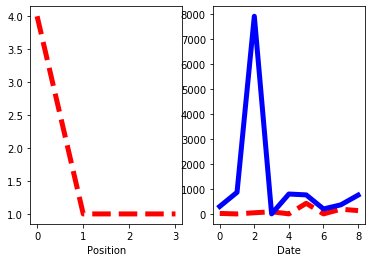

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = [i  for i in range(len(position))]
print(x)
y = [position[i] for i in position]
soldline = []
pos = [i for i in position]
print(y)
plt.subplot(1,2,1)
plt.plot(x, y,color='red', linewidth=5.0, linestyle='--')
plt.xlabel('Position')
plt.subplot(1,2,2)
yy = [yy['sold'] for yy in redata] #sold
mon =[]
for i in redata:
    if type(i["money"]) ==list:
        mon.append(max(i['money']))
    else:
        mon.append(i['money'])
print(mon)
xx = [i for i in range(len(data))]
plt.plot(xx,yy,color='red', linewidth=5.0, linestyle='--')  #sold
plt.plot(xx,mon,color='blue', linewidth=5.0, linestyle='-')  #money
plt.xlabel("Date")
#plt.xticks([x for x in x] ,[i for i in position])
#data = [position[i] for i in position]
#plt.plot(data,y,color='red', linewidth=5.0, linestyle='--')
#plt.xlabel('Position')
#plt.show()